In [1]:
import wave
import os
import io
import pathlib
from pathlib import Path
from scipy.io import wavfile
import sounddevice as sd
import time
import librosa as lb
import librosa.display as dsp
import numpy as np
import matplotlib.pyplot as plt
from os import path, listdir
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
import time

In [10]:
audio_in = sd.InputStream(samplerate = 16000, channels = 1)
audio_in.start()
print('started')
data_chunk, _ = audio_in.read(16000)
audio_in.stop()
print('stopped')
sd.play(data_chunk, 16000)
time.sleep(1.0)
sd.stop()

started
stopped


In [29]:
data_chunk_r = data_chunk.ravel()
data_chunk_r = data_chunk_r.astype(float)

In [43]:
mfcc_sample = lb.feature.mfcc(y = data_chunk_r, sr = 16000, n_mfcc = 32)
melnormalized = lb.util.normalize(mfcc_sample)
mel_ah = mfcc_sample - 100
mel_ah = mel_ah*-1

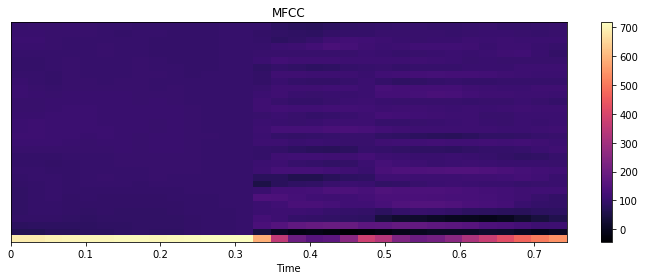

In [44]:
plt.figure(figsize=(10, 4))
lb.display.specshow(mel_ah, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [22]:
mfcc_sample.shape

(32, 32)

In [23]:
model = keras.models.load_model('model')

In [45]:
pred = model.predict(mel_ah.reshape(1,32,32,1))

In [25]:
REAL_CATEGORIES = ["bed", "bird", "cat", "dog", "down", "eight", "five", "four","go","happy","house","left","marvin","nine","no","off","on","one","right","seven","sheila","six","stop","three","tree","two","up","wow","yes","zero"]
revDict = dict()
for i in range(len(REAL_CATEGORIES)):
    revDict[i] = REAL_CATEGORIES[i]

In [46]:
print('prediction:', revDict[np.argmax(pred)])
    
pred = pred.ravel()

pred_class = None

for i in range(len(pred)):
    if pred[i] > 0.86:
        pred_class = revDict[i]  
print("pred_class:", pred_class)

prediction: zero
pred_class: zero


In [27]:
sd.play(data_chunk, 16000)
time.sleep(1.0)
sd.stop()